# Gold Price Prediction By using ML Regression Algorithms

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Collection & Data Anlayis

dataset = pd.read_csv("gold_price_data.csv")

In [3]:
# to check first five records
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# To check Shape of data

dataset.shape

(2290, 6)

In [5]:
# To check data type of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# To Check the null value
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# To measure statistical data
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
# To find correllation 
#1. Postive Correlltion
# 2. Negative Correlation

In [9]:
correlation = dataset.corr()

In [10]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


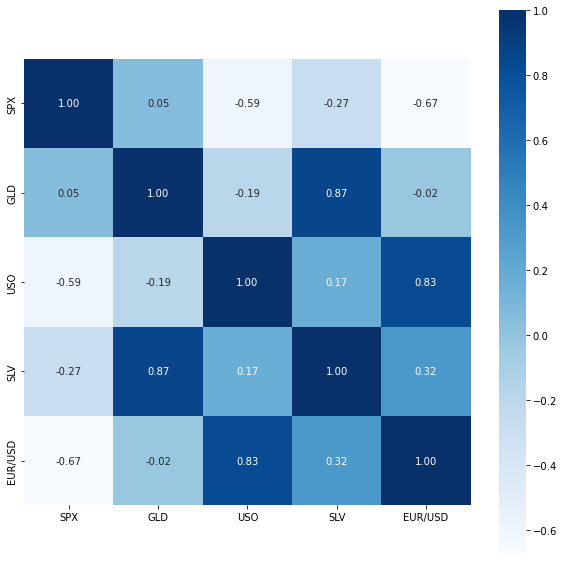

In [11]:
# Data Visulize to understand correaltion

plt.figure(figsize=(10,10))
sns.heatmap(correlation , annot =True, cbar=True, cmap= 'Blues', fmt='.2f', square=True )
plt.show()

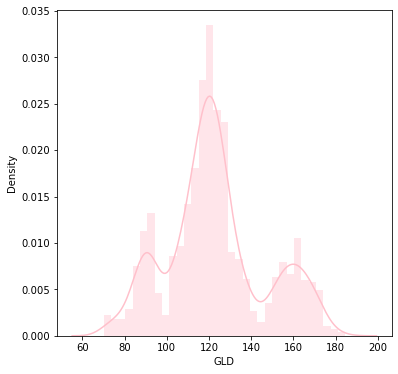

In [12]:
# checking the distribution of the GLD Price
plt.figure(figsize=(6,6))
sns.distplot(dataset['GLD'],color='pink')
plt.show()

In [13]:
# To check Columns name
dataset.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [14]:
# Splitting the Features and Target

X = dataset.drop(['Date' , 'GLD'] , axis=True)
y = dataset["GLD"]

In [15]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [16]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

# Training & Test data

In [17]:
# Import required libraries for training & testing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test , y_train, y_test =train_test_split(X,y , test_size=0.2 , random_state=2)

In [19]:
# To check shape of data
print(X.shape , X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [20]:
# Model Training:- RandomForest Regression

model = RandomForestRegressor()
model

RandomForestRegressor()

In [21]:
# Train the model with trainig data
model.fit(X_train ,y_train)

RandomForestRegressor()

# Model Evalution

In [22]:
## Predication on Training data

X_train_prediction = model.predict(X_train)

In [23]:
X_train_prediction

array([109.94329801, 114.8175007 ,  90.82909992, ..., 130.88889736,
       159.83239621, 114.86979979])

In [24]:
# R squared error
error_score = metrics.r2_score(y_train, X_train_prediction)
print("R squared error : ", error_score)

R squared error :  0.9985956500554933


In [25]:
# Predication on Test data

X_test_prediction = model.predict(X_test)

In [26]:
print(X_test_prediction)

[168.57659928  82.07349975 116.00039999 127.58430075 120.9215013
 154.72899717 150.0126991  126.00950026 117.3493989  126.05810064
 116.88090077 171.62400144 142.07929814 167.96589942 115.06420037
 117.87470016 138.21630249 169.96540075 159.47490304 156.73919929
 155.22330057 125.17739995 176.6215992  157.21780322 125.18590037
  93.98649992  77.32690013 120.75029989 119.08549924 167.54260021
  87.98040067 125.25400016  91.17750081 117.53289999 121.20259896
 136.27860066 115.66650095 115.50390062 146.65519927 107.14710106
 104.5263026   87.0828979  126.57960033 117.90780009 153.11649903
 119.75369991 108.37780004 108.08189793  93.17460051 127.15339763
  74.65300032 113.57299938 121.30510021 111.21529937 118.86829887
 120.72319931 159.32740029 167.62120102 146.76439679  85.86269853
  94.29640056  86.82729888  90.42880025 118.91050061 126.49270039
 127.6623003  169.0189996  122.33119919 117.66399872  98.29710049
 168.25840195 142.86299841 131.96280235 121.16930219 120.57129958
 119.611600

In [27]:
# R squared error on testing data
error_score = metrics.r2_score(y_test, X_test_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890374451282898


In [28]:
y_test =list(y_test)

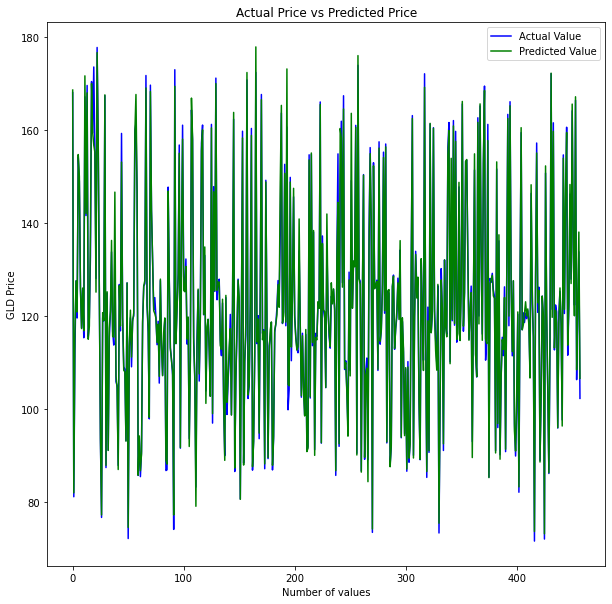

In [29]:
# Data Visulization

# Compare Acutal Price & predicated price

plt.figure(figsize=(10,10))
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(X_test_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [30]:
# To compare data by other model

# Linear Regression 

In [31]:
# Splitting the Features and Target

X = dataset.drop(['Date' , 'GLD'] , axis=True)
y = dataset["GLD"]

In [32]:
# Import required libraries

from sklearn.linear_model import LinearRegression

In [33]:
X_train, X_test , y_train, y_test =train_test_split(X,y , test_size=0.2 , random_state=2)

In [34]:
# Model Training:- Linear regression 
model_lin_reg = LinearRegression()

In [35]:
model_lin_reg

LinearRegression()

In [36]:
# train model with training data
model_lin_reg.fit(X_train , y_train)

LinearRegression()

In [37]:
## Predication on Test data
X_test_predictation = model_lin_reg.predict(X_test) 

In [38]:
# To find R squared on testing data
error_score = metrics.r2_score(y_test, X_test_predictation)
error_score

0.8657886565869236

# Lasso

In [39]:
# Splitting the Features and Target

X = dataset.drop(['Date' , 'GLD'] , axis=True)
y = dataset["GLD"]

In [40]:
# Import required libraries

from sklearn.linear_model import Lasso

In [41]:
X_train, X_test , y_train, y_test =train_test_split(X,y , test_size=0.2 , random_state=2)

In [42]:
# Model Training:-Lasso
model_lasso = Lasso()

In [43]:
# train model with training data
model_lasso.fit(X_train , y_train)

Lasso()

In [44]:
## Predication on Test data

X_test_predictation = model_lasso.predict(X_test) 

In [45]:
# To find R squared on testing data
error_score = metrics.r2_score(y_test, X_test_predictation)
error_score

0.8644937172756186